In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-08-08,166.369995,167.809998,164.199997,164.869995,164.119019,60276900,APPLE
2022-08-09,164.020004,165.820007,163.250000,164.919998,164.168793,63135500,APPLE
2022-08-10,167.679993,169.339996,166.899994,169.240005,168.469116,70170500,APPLE
2022-08-11,170.059998,170.990005,168.190002,168.490005,167.722534,57149200,APPLE
2022-08-12,169.820007,172.169998,169.399994,172.100006,171.316086,68039400,APPLE


In [ ]:
# checking for missing values
print(df.isnull().sum())

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64


In [ ]:
#Create a new feature 'price_change'
df['price_change'] = df['Close'] - df['Open']

#Create a new feature 'returns'
df['returns'] = df['Close'].pct_change()

#Create a new feature 'average_price'
df['average_price'] = (df['Close'] + df['Open']) / 2
# 'price_range': This feature calculates the difference between the highest and lowest prices for a given day, and can be used to determine the overall range of prices for that day.

#Create a new feature 'price_range'
df['price_range'] = df['High'] - df['Low']
# 'volume_change': This feature calculates the difference in trading volume from one day to the next, and can be used to determine the overall change in trading volume over time.

#Create a new feature 'volume_change'
df['volume_change'] = df['Volume'].diff()

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,price_change,returns,average_price,price_range,volume_change
Date,,,,,,,,,,,,
2022-08-08,166.369995,167.809998,164.199997,164.869995,164.119019,60276900,APPLE,-1.500000,NaN,165.619995,3.610001,NaN
2022-08-09,164.020004,165.820007,163.250000,164.919998,164.168793,63135500,APPLE,0.899994,0.000303,164.470001,2.570007,2858600.0
2022-08-10,167.679993,169.339996,166.899994,169.240005,168.469116,70170500,APPLE,1.560013,0.026195,168.459999,2.440002,7035000.0
2022-08-11,170.059998,170.990005,168.190002,168.490005,167.722534,57149200,APPLE,-1.569992,-0.004432,169.275002,2.800003,-13021300.0
2022-08-12,169.820007,172.169998,169.399994,172.100006,171.316086,68039400,APPLE,2.279999,0.021426,170.960007,2.770004,10890200.0


Text(0, 0.5, 'Frequency')

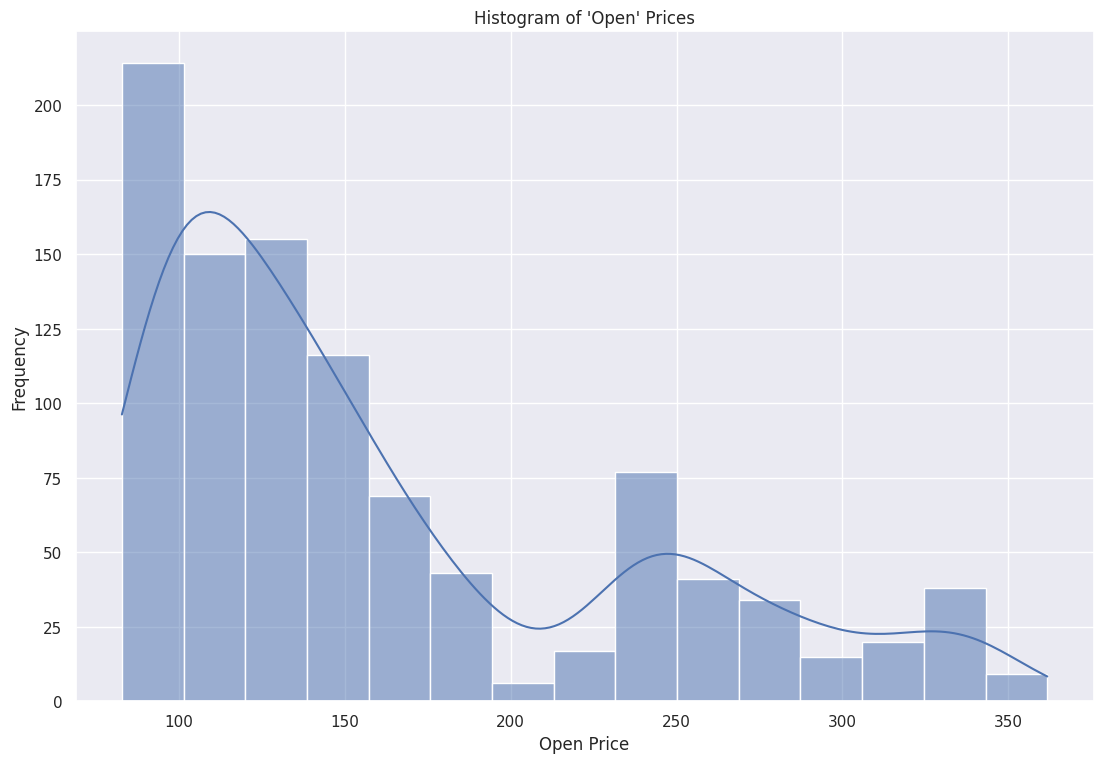

In [ ]:
#Set figure size
sns.set(rc={'figure.figsize':(11.7,8.27)})

#Create histogram of 'open' column
sns.histplot(data=df, x='Open', kde=True)

#Add title and labels
plt.title("Histogram of 'Open' Prices")
plt.xlabel("Open Price")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

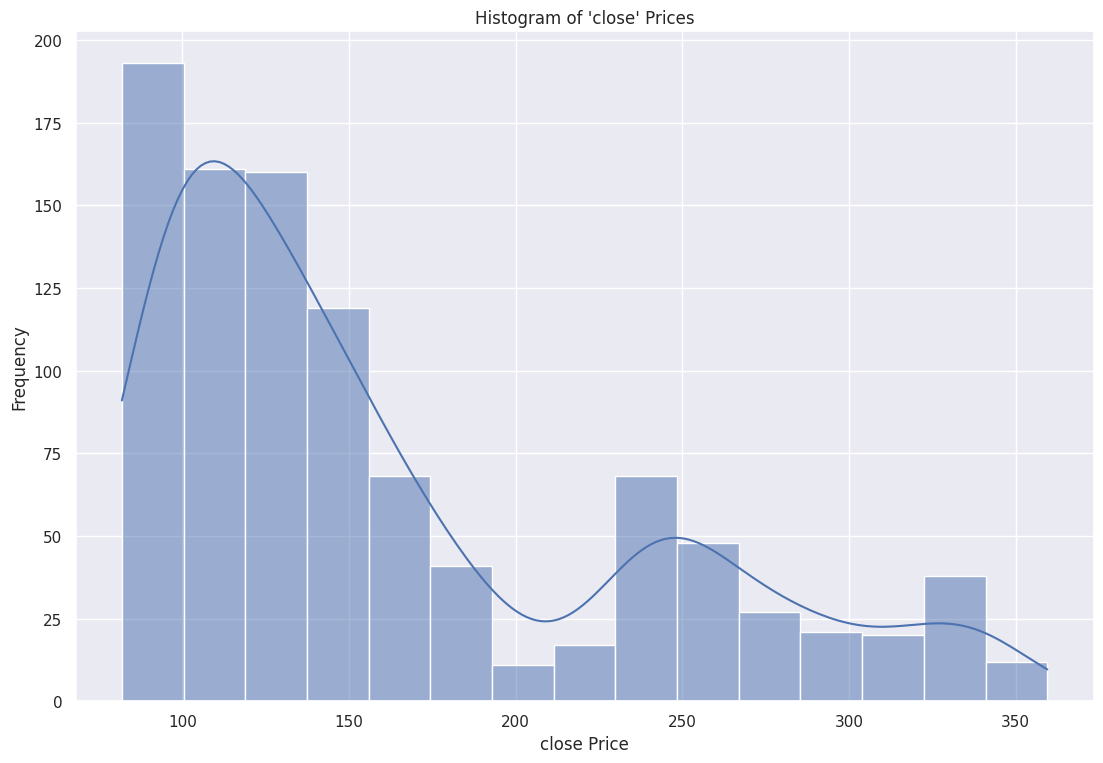

In [ ]:
#Set figure size
sns.set(rc={'figure.figsize':(11.7,8.27)})

#Create histogram of 'close' column
sns.histplot(data=df, x='Close', kde=True)

#Add title and labels
plt.title("Histogram of 'close' Prices")
plt.xlabel("close Price")
plt.ylabel("Frequency")

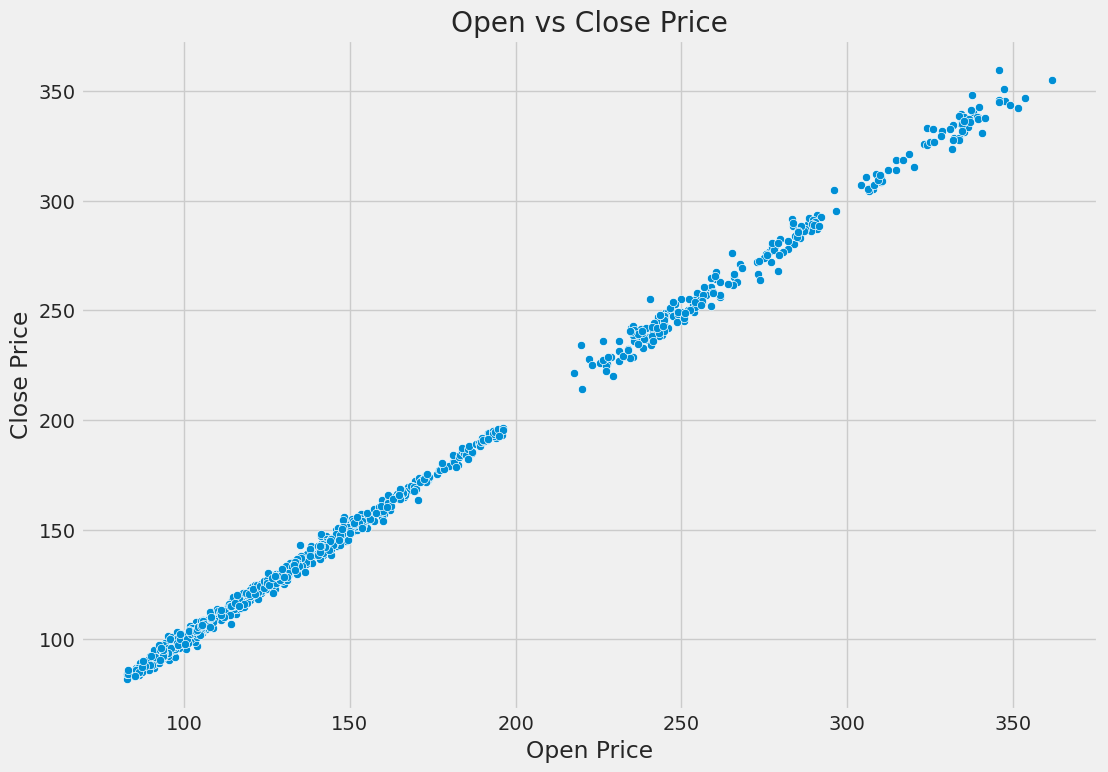

In [ ]:
# set figure size
plt.figure(figsize=(11.7,8.27))

# create scatter plot
sns.scatterplot(x='Open', y='Close', data=df)

# add labels and title
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Open vs Close Price')

# show plot
plt.show()

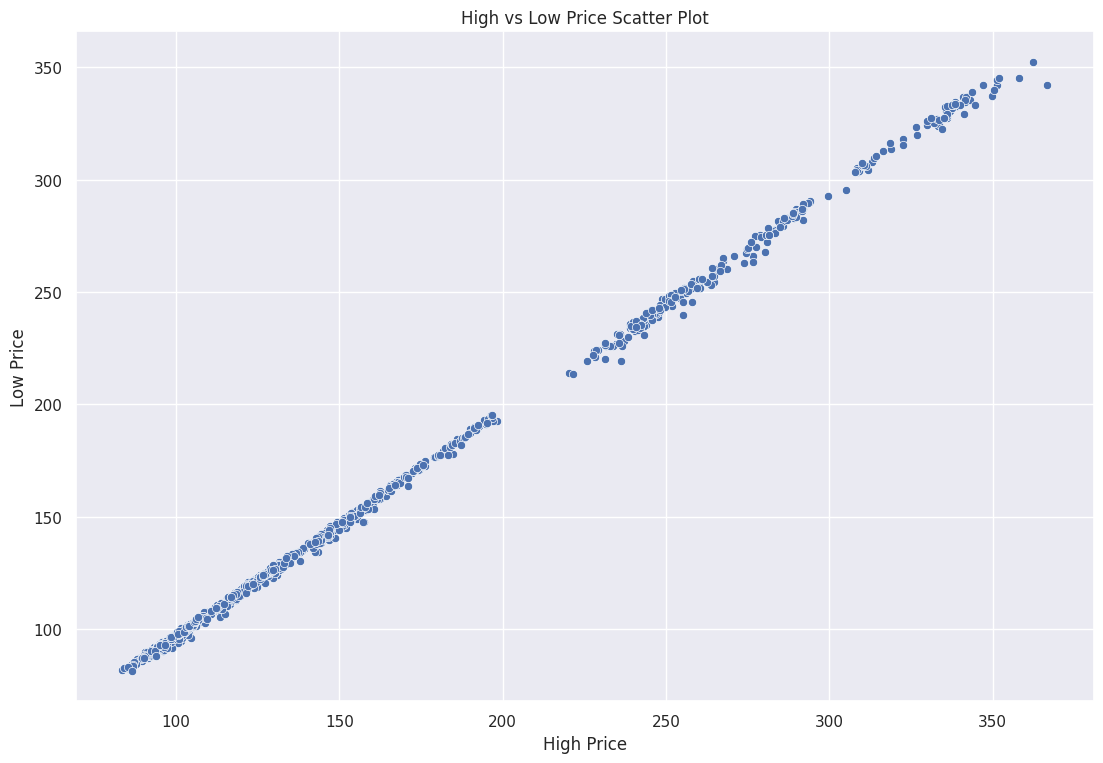

In [ ]:
plt.figure(figsize=(11.7,8.27))
sns.scatterplot(x='High', y='Low', data=df)
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.title('High vs Low Price Scatter Plot')
plt.show()

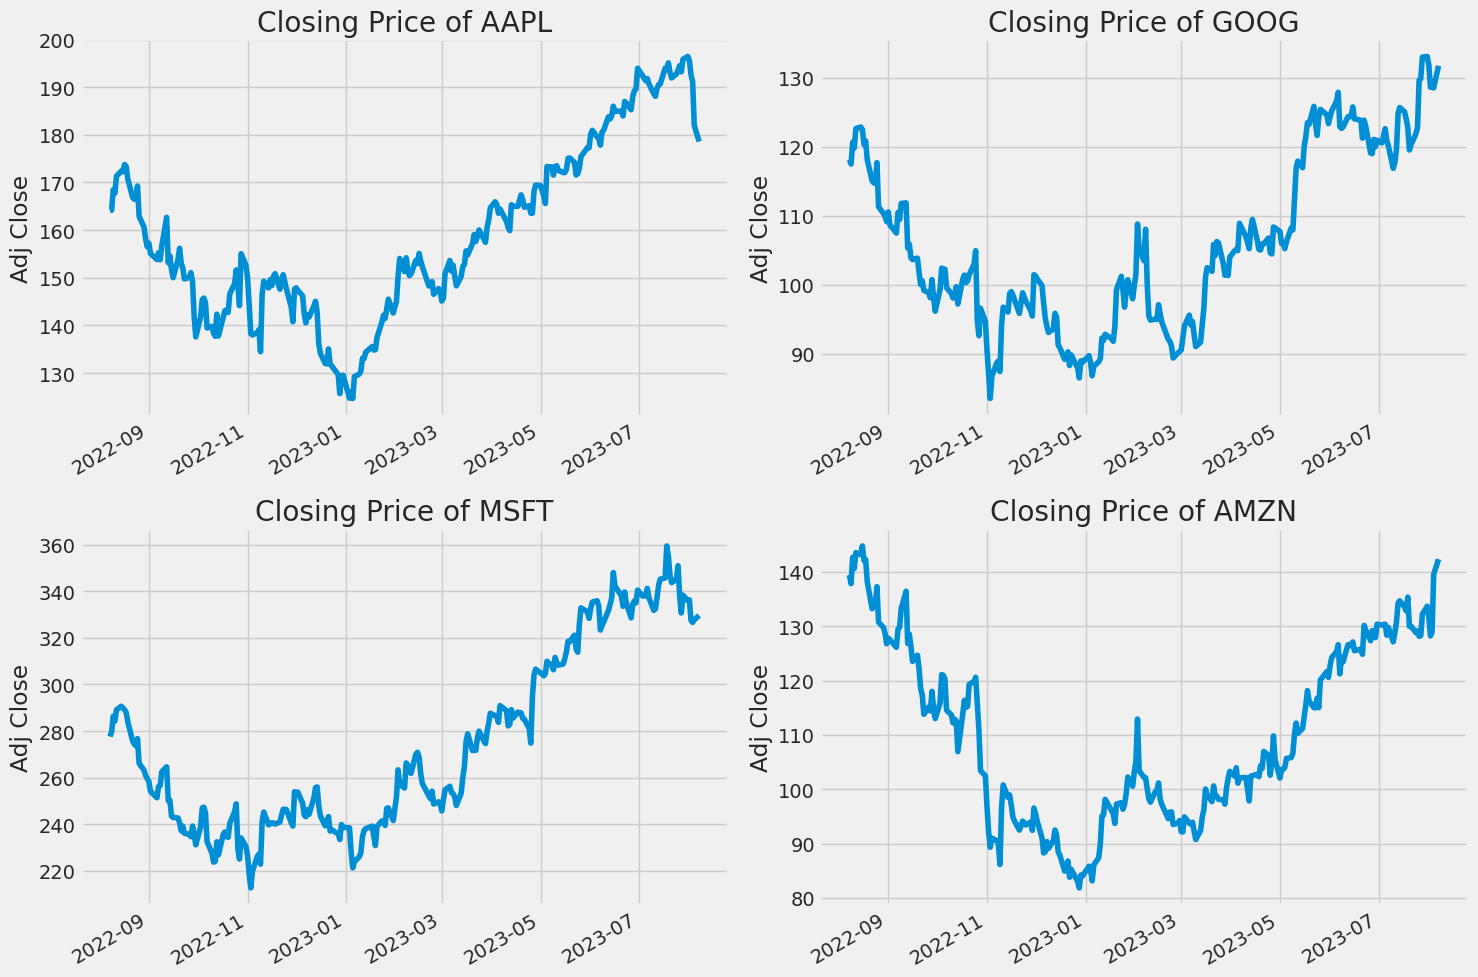

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

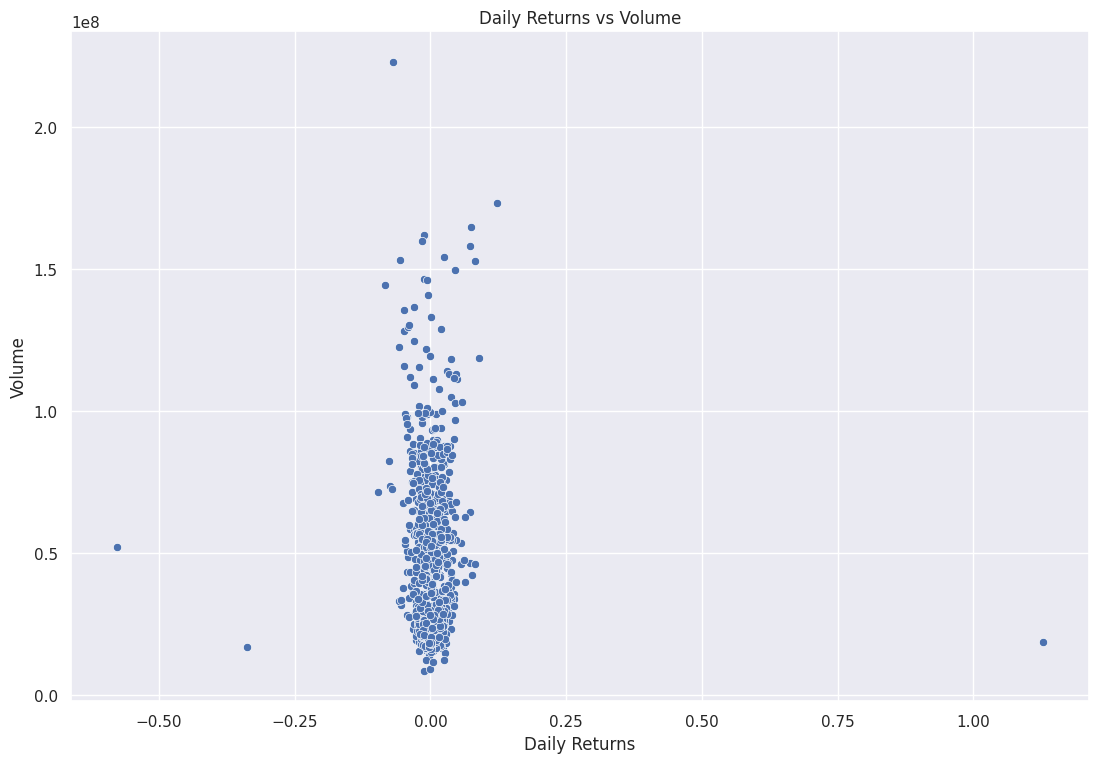

In [ ]:
plt.figure(figsize=(11.7,8.27))
sns.scatterplot(x='returns', y='Volume', data=df)
plt.xlabel('Daily Returns')
plt.ylabel('Volume')
plt.title('Daily Returns vs Volume')
plt.show()

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,price_change,returns,average_price,price_range,volume_change
Date,,,,,,,,,,,,
2022-08-08,166.369995,167.809998,164.199997,164.869995,164.119019,60276900,APPLE,-1.500000,NaN,165.619995,3.610001,NaN
2022-08-09,164.020004,165.820007,163.250000,164.919998,164.168793,63135500,APPLE,0.899994,0.000303,164.470001,2.570007,2858600.0
2022-08-10,167.679993,169.339996,166.899994,169.240005,168.469116,70170500,APPLE,1.560013,0.026195,168.459999,2.440002,7035000.0
2022-08-11,170.059998,170.990005,168.190002,168.490005,167.722534,57149200,APPLE,-1.569992,-0.004432,169.275002,2.800003,-13021300.0
2022-08-12,169.820007,172.169998,169.399994,172.100006,171.316086,68039400,APPLE,2.279999,0.021426,170.960007,2.770004,10890200.0


<ipython-input-83-971f301b22a4>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(), annot=True)


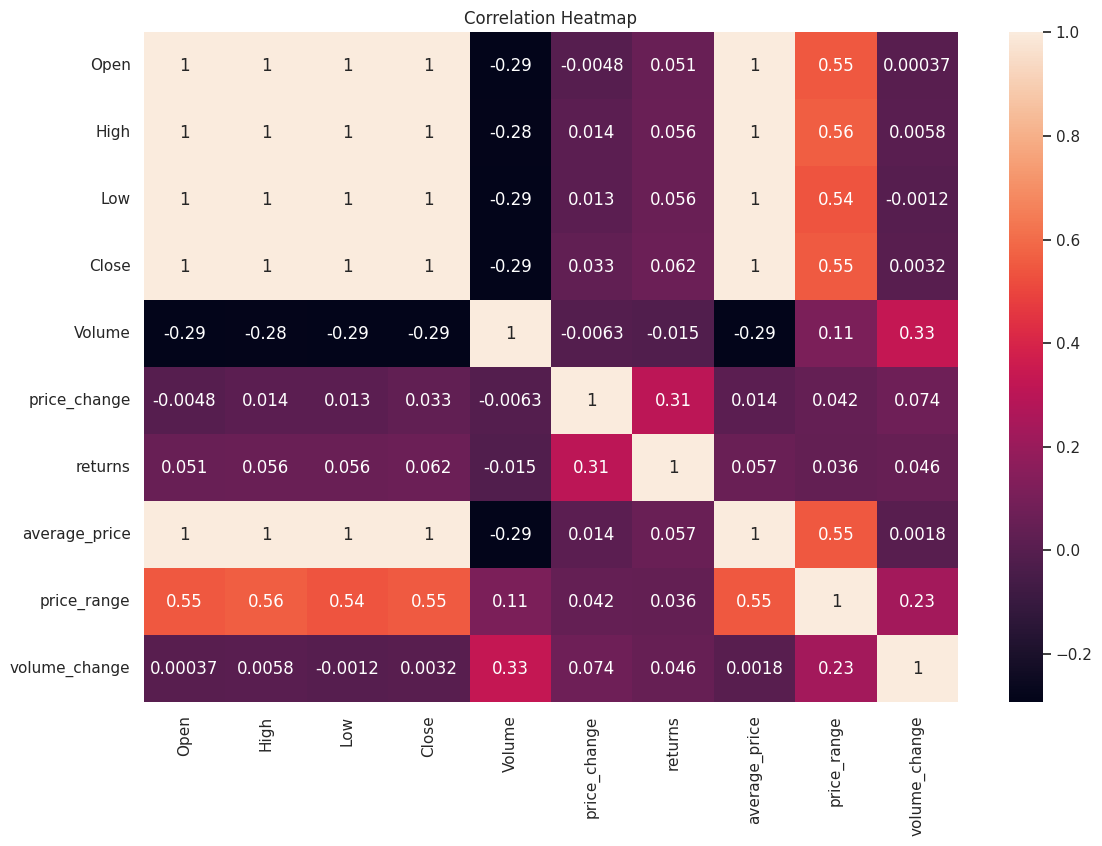

In [ ]:
df_new = df[['Open', 'High', 'Low', 'Close', 'Volume', 'company_name',
       'price_change', 'returns', 'average_price', 'price_range',
       'volume_change']]

# create correlation heatmap
sns.heatmap(df_new.corr(), annot=True)

# add labels and title
plt.title('Correlation Heatmap')

# show plot
plt.show()

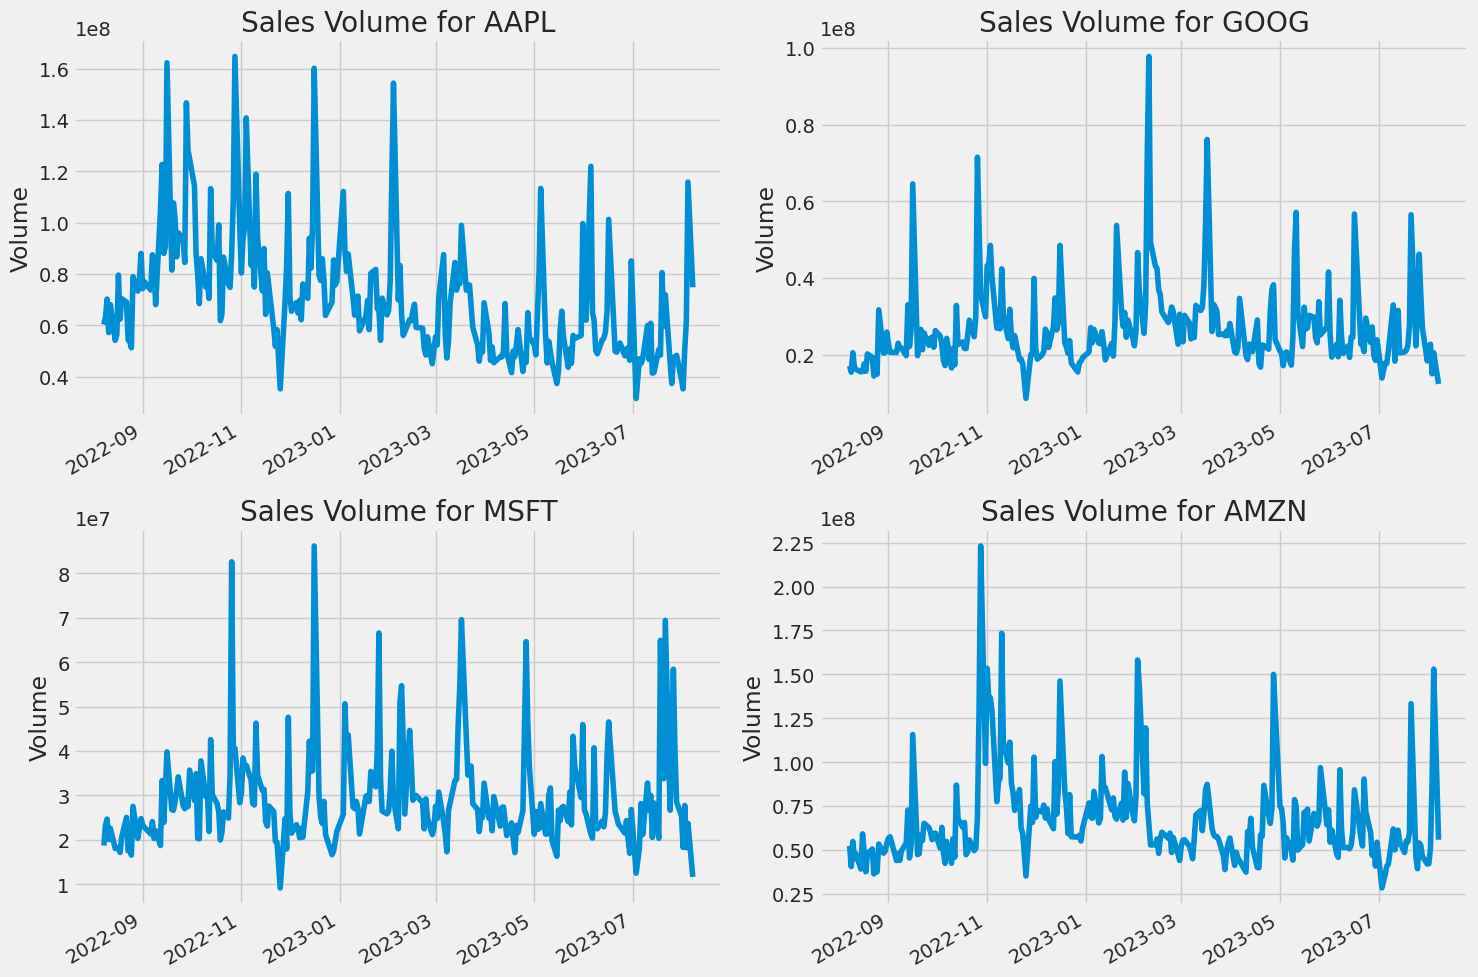

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

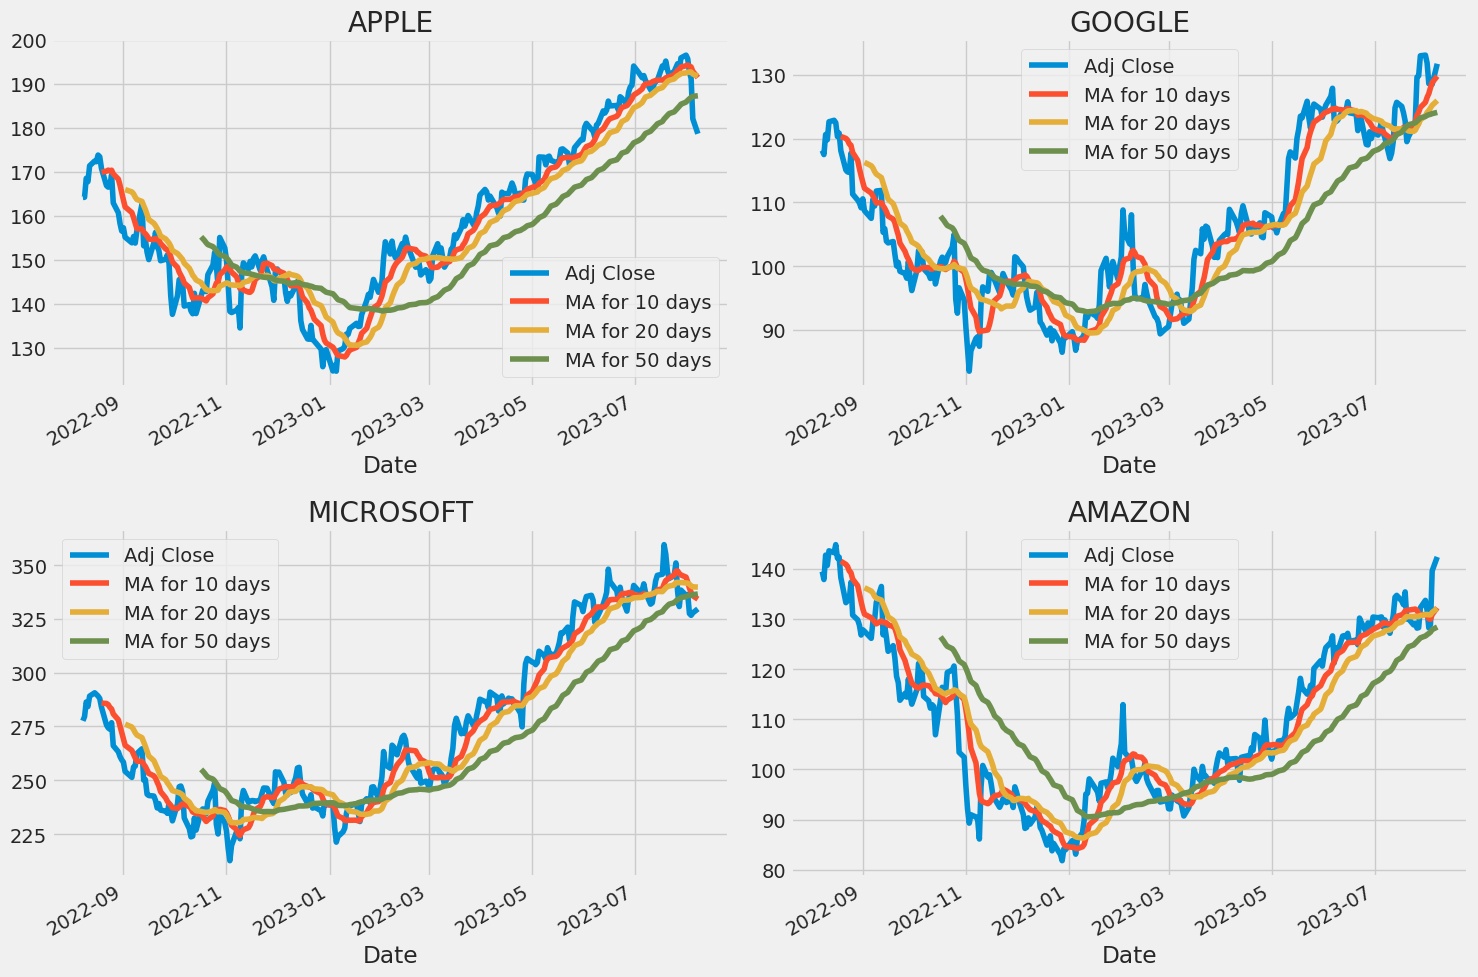

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

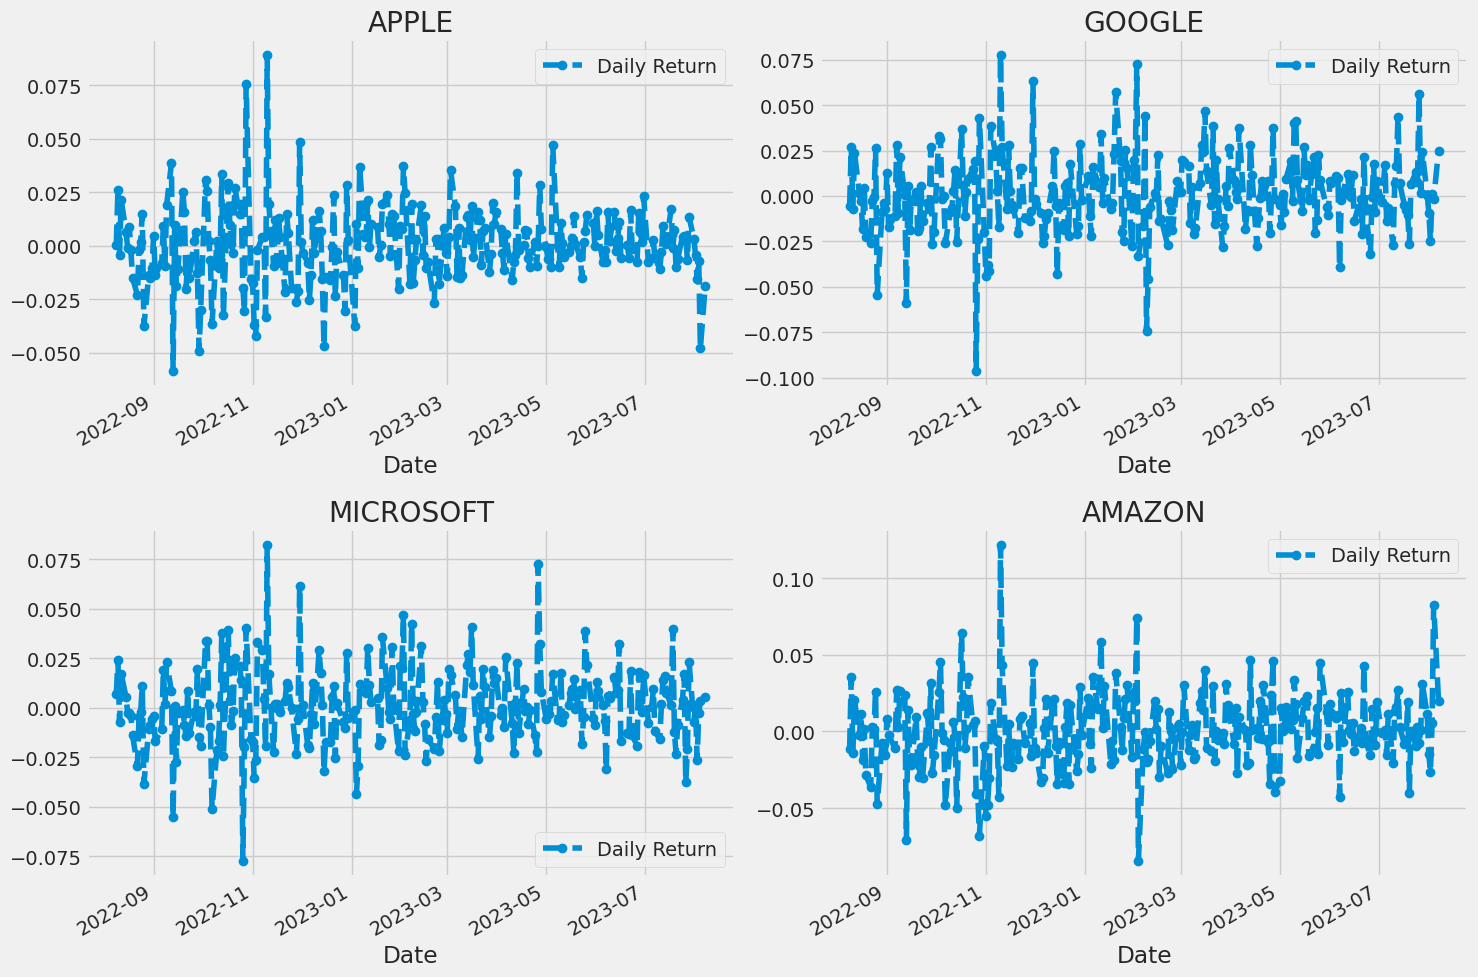

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

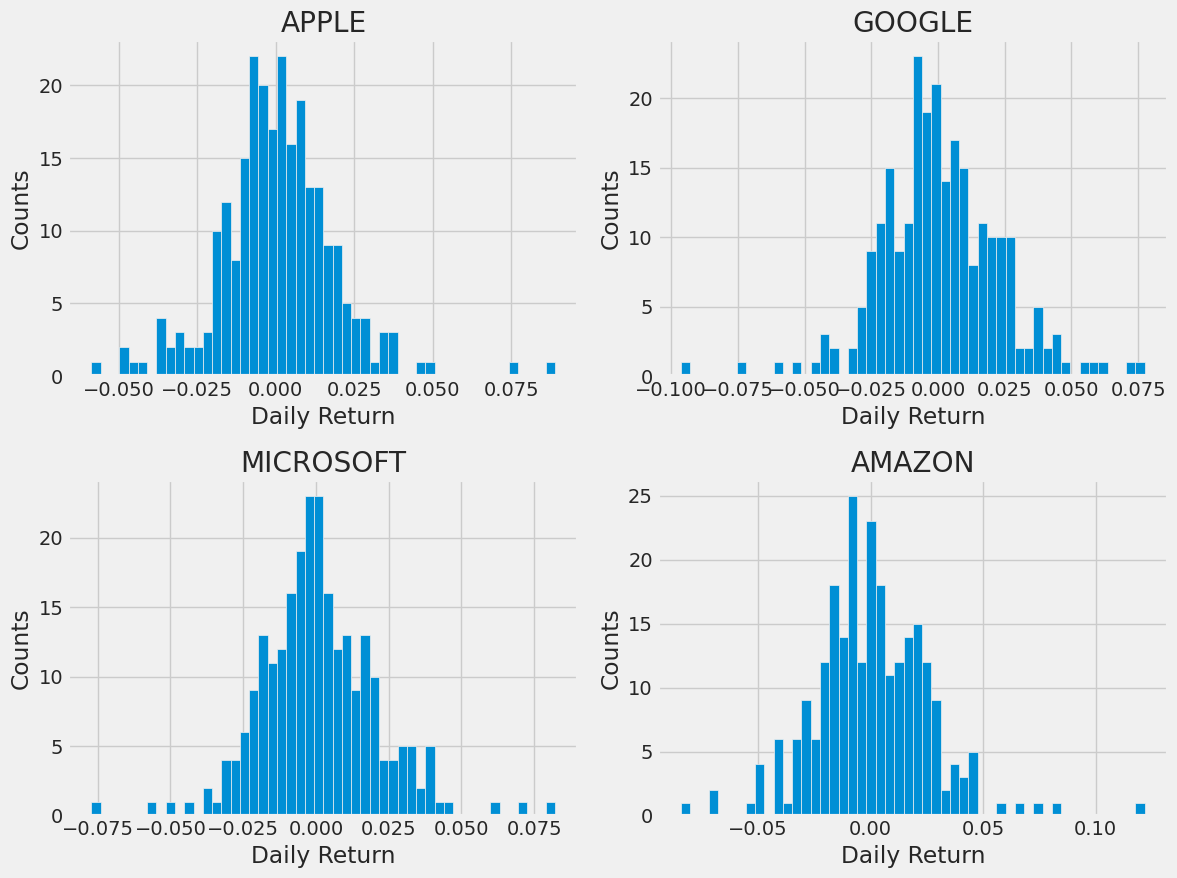

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-08,NaN,NaN,NaN,NaN
2022-08-09,0.000303,-0.011333,-0.005417,0.007063
2022-08-10,0.026195,0.035261,0.026809,0.024301
2022-08-11,-0.004432,-0.014367,-0.006879,-0.007401
2022-08-12,0.021426,0.020691,0.023619,0.017037


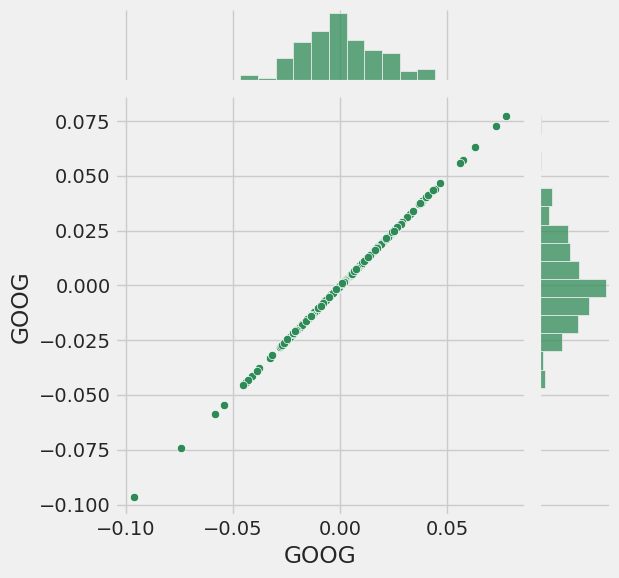

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

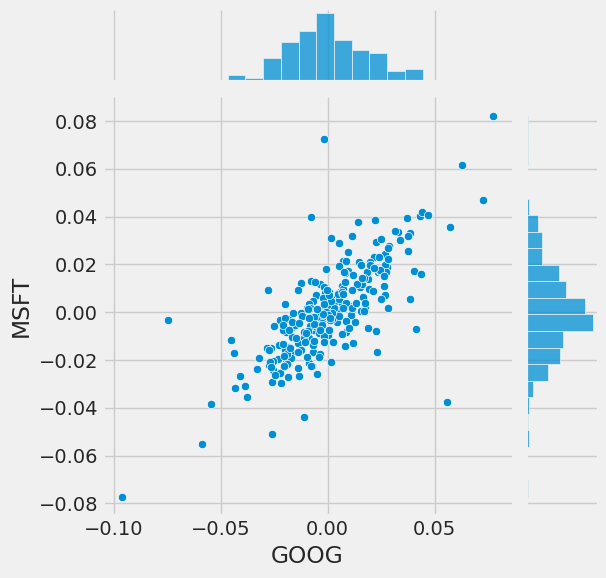

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

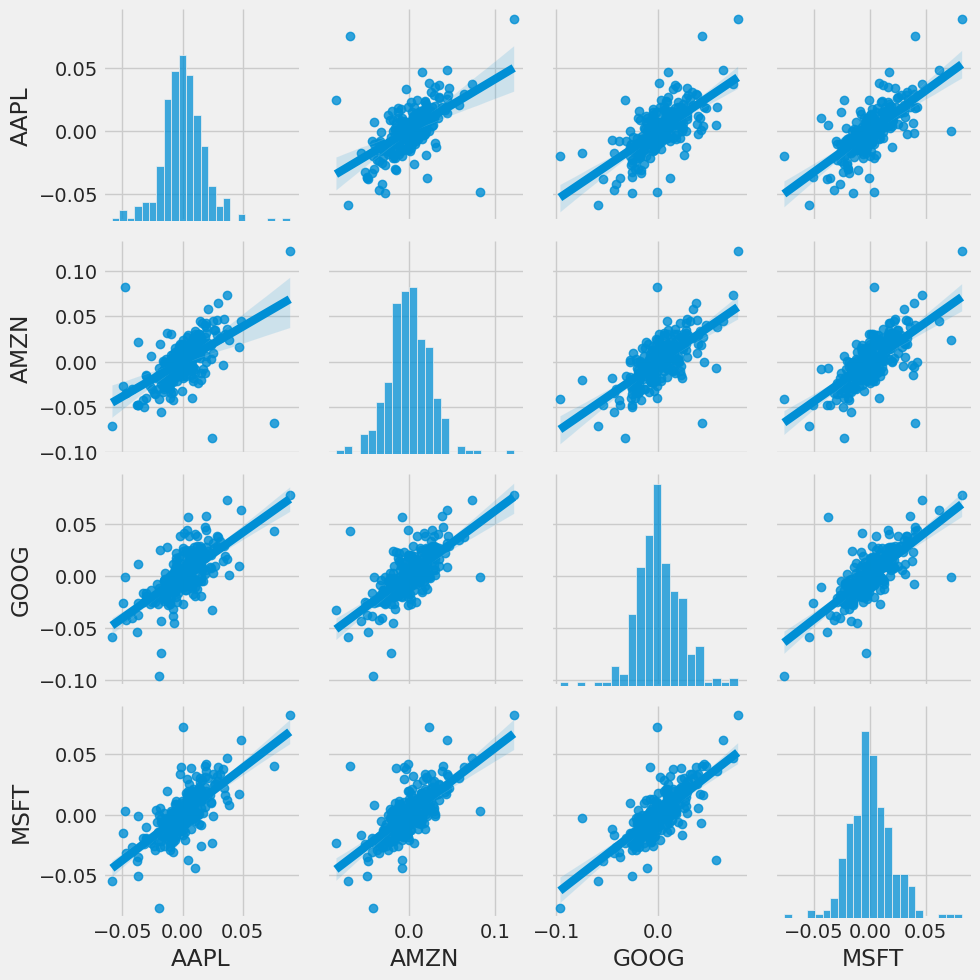

In [ ]:
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

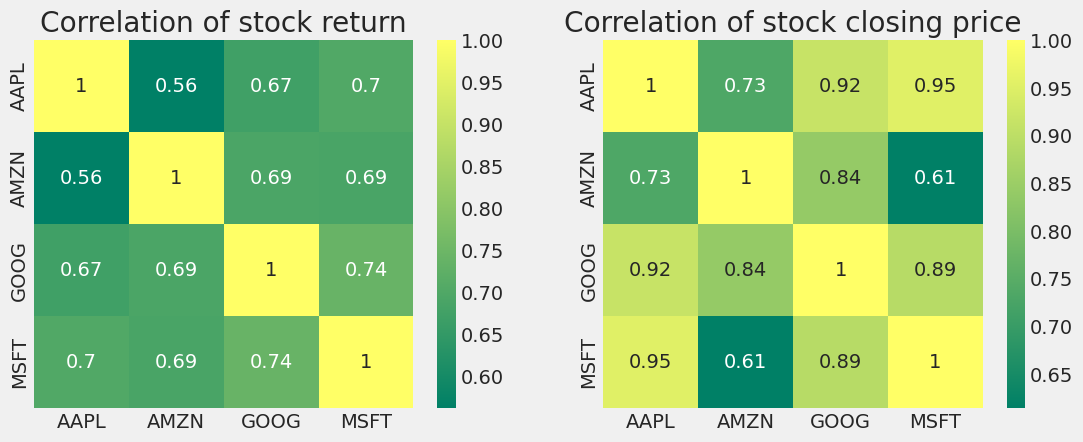

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name,price_change,returns,average_price,price_range,volume_change
Date,,,,,,,,,,,,
2023-08-01,133.550003,133.690002,131.619995,131.690002,131.690002,42098500,AMAZON,-1.860001,-0.014886,132.620003,2.070007,197000.0
2023-08-02,130.149994,130.229996,126.820000,128.210007,128.210007,51027600,AMAZON,-1.939987,-0.026426,129.180000,3.409996,8929100.0
2023-08-03,127.480003,129.839996,126.410004,128.910004,128.910004,88585200,AMAZON,1.430000,0.005460,128.195004,3.429993,37557600.0
2023-08-04,141.059998,143.630005,139.320007,139.570007,139.570007,152938700,AMAZON,-1.489990,0.082693,140.315002,4.309998,64353500.0
2023-08-07,140.990005,142.539993,138.949997,142.329895,142.329895,55737640,AMAZON,1.339890,0.019774,141.659950,3.589996,-97201060.0
